In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
import seaborn as sns

In [3]:
train_df=pd.read_excel('C:\\Users\\GOMATHI\\Downloads\\Flight-Price-Prediction-master\\Data_Train.xlsx')

In [4]:
test_df=pd.read_excel('C:\\Users\\GOMATHI\\Downloads\\Flight-Price-Prediction-master\\Test_set.xlsx')

In [5]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
big_df=train_df.append(test_df,sort=False)

In [8]:
big_df.shape

(13354, 11)

In [9]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

## Feature Engineering

In [11]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month']=big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year']=big_df['Date_of_Journey'].str.split('/').str[2]

In [12]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [13]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [14]:
big_df['Date']=big_df['Date'].astype(int)
big_df['Month']=big_df['Month'].astype(int)
big_df['Year']=big_df['Year'].astype(int)

In [15]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [16]:
big_df=big_df.drop(['Date_of_Journey'],axis=1)

In [17]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
big_df['Arrival_Time']=big_df['Arrival_Time'].str.split(' ').str[0]

In [19]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [20]:
big_df['Total_Stops'].isnull().sum()

1

In [21]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [22]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [23]:
big_df['Total_Stops'].isnull().sum()

0

In [24]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop', '0 stop')

In [25]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [26]:
big_df['Total_Stops'] = big_df['Total_Stops'].str.split(' ').str[0]

In [27]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [28]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [29]:
big_df['Stop'] =big_df['Total_Stops'].astype(int)
big_df=big_df.drop(['Total_Stops'],axis=1)

In [30]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [31]:
big_df['Arrival_Hour']=big_df['Arrival_Time'].str.split(':').str[0]
big_df['Arrival_Minute']=big_df['Arrival_Time'].str.split(':').str[1]

In [32]:
big_df['Arrival_Hour']=big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute']=big_df['Arrival_Minute'].astype(int)

In [33]:
big_df=big_df.drop(['Arrival_Time'],axis=1)

In [34]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [35]:
big_df['Dep_Hour']=big_df['Dep_Time'].str.split(':').str[0]
big_df['Dep_Minute']=big_df['Dep_Time'].str.split(':').str[1]
big_df['Dep_Hour']=big_df['Dep_Hour'].astype(int)
big_df['Dep_Minute']=big_df['Dep_Minute'].astype(int)

In [36]:
big_df=big_df.drop(['Dep_Time'],axis=1)

In [37]:
big_df.head(1)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20


In [38]:
big_df['Route 1']=big_df['Route'].str.split('→').str[0]
big_df['Route 2']=big_df['Route'].str.split('→').str[1]
big_df['Route 3']=big_df['Route'].str.split('→').str[2]
big_df['Route 4']=big_df['Route'].str.split('→').str[3]
big_df['Route 5']=big_df['Route'].str.split('→').str[4]

In [39]:
big_df.head(2)

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route 1,Route 2,Route 3,Route 4,Route 5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN


In [40]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [41]:
big_df['Route 1'].fillna("None",inplace=True)
big_df['Route 2'].fillna("None",inplace=True)
big_df['Route 3'].fillna("None",inplace=True)
big_df['Route 4'].fillna("None",inplace=True)
big_df['Route 5'].fillna("None",inplace=True)

In [42]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route 1,Route 2,Route 3,Route 4,Route 5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [43]:
big_df=big_df.drop(['Route'],axis=1)
big_df=big_df.drop(['Duration'],axis=1)

In [44]:
big_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route 1,Route 2,Route 3,Route 4,Route 5
0,IndiGo,Banglore,New Delhi,No info,3897.000000,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.000000,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.000000,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.000000,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.000000,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,9087.064121,6,6,2019,1,20,25,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,No info,9087.064121,27,3,2019,0,16,55,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,9087.064121,6,3,2019,1,4,25,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,No info,9087.064121,6,3,2019,1,19,15,4,0,DEL,BOM,COK,None,None


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df['Airline']=encoder.fit_transform(big_df['Airline'])
big_df['Source']=encoder.fit_transform(big_df['Source'])
big_df['Destination']=encoder.fit_transform(big_df['Destination'])
big_df['Additional_Info']=encoder.fit_transform(big_df['Additional_Info'])
big_df['Route 1']=encoder.fit_transform(big_df['Route 1'])
big_df['Route 2']=encoder.fit_transform(big_df['Route 2'])
big_df['Route 3']=encoder.fit_transform(big_df['Route 3'])
big_df['Route 4']=encoder.fit_transform(big_df['Route 4'])
big_df['Route 5']=encoder.fit_transform(big_df['Route 5'])

In [48]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Route 1,Route 2,Route 3,Route 4,Route 5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,30,13,5
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,5
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,5
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,13,5
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,13,5


In [50]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [52]:
df_train=big_df[0:10683]
df_test=big_df[10683:]

In [55]:
X=df_train.drop(['Price'],axis=1)
y=df_train['Price']

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [58]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [59]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [60]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [61]:
selected_features=x_train.columns[(model.get_support())]

In [62]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour', 'Dep_Minute',
       'Route 1', 'Route 2', 'Route 3', 'Route 4', 'Route 5'],
      dtype='object')

In [63]:
x_train=x_train.drop(['Year'],axis=1)

In [64]:
x_test=x_test.drop(['Year'],axis=1)

## RandomForestRegressor

In [67]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV


#Number of trees in random forest
n_estimators =[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
#maximum no of levels in tree
max_depth =[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#minimum no of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [70]:
#Create the random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [71]:
#use the random grid to search for best hyperparameters
#FIRST create the base model is tune

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [74]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=50,cv=5,verbose=2,random_state=0)

In [75]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=  14.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.2s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=  14.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=  14.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=  14.4s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=  14.4s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   7.0s
[CV] n_estimators=500, min_samples_split=10

[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=  12.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=  16.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=  16.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=  11.6s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=  11.5s
[CV] n_estimators=900, min_samples_split=10, min_sam

[CV]  n_estimators=900, min_samples_split=15, min_samples_leaf=10, max_features=auto, max_depth=10, total=  24.3s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=100, min_samples_split=15, min_s

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   9.8s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   3.7s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   3.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   3.6s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   3.5s
[CV] n_estimators=500, min_

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   7.5s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   7.1s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   7.6s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   7.6s
[CV] n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=800, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   8.0s
[CV] n_estimators=800, min_samples_split=15, m

[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=  30.6s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=  30.2s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=  31.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   3.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   3.9s
[CV] n_estimators=400, min_samples_split=5, min

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   8.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   9.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=  14.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=  13.5s
[CV] n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=200, min_samples_split=100, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   2.3s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 131.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [76]:
y_pred=rf_random.predict(x_test)

ValueError: `bins` must increase monotonically, when an array

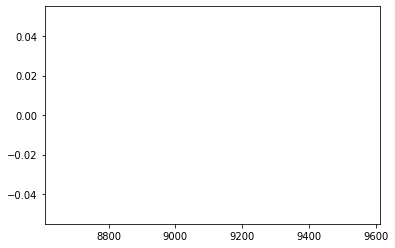

In [77]:
import seaborn as sns
sns.distplot(y_test,y_pred)

In [ ]:
plt.scatter(y_test,y_pred)